<a href="https://colab.research.google.com/github/JatinKrRana/AlmaBetter-Capstone_Project_1/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [55]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# Load Dataset
play_store_df = pd.read_csv('/content/drive/MyDrive/csv data files/Play Store Data.csv')
user_review_df = pd.read_csv('/content/drive/MyDrive/csv data files/User Reviews.csv')

### Dataset First View

In [58]:
# Dataset First Look
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [59]:
user_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [60]:
# Dataset Rows & Columns count
play_store_df_rows = play_store_df.shape[0]
play_store_df_columns = play_store_df.shape[1]
print(f"Number of rows in play_store_df is {play_store_df_rows} and columns is {play_store_df_columns}.")

Number of rows in play_store_df is 10841 and columns is 13.


In [61]:
user_review_df_rows = user_review_df.shape[0]
user_review_df_columns = user_review_df.shape[1]
print(f"Number of rows in user_review_df is {user_review_df_rows} and columns is {user_review_df_columns}.")

Number of rows in user_review_df is 64295 and columns is 5.


### Dataset Information

In [62]:
# Dataset Info
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [63]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [64]:
# Dataset Duplicate Value Count
def duplicate_value_count(data):
  list1 = []
  duplicate_values = 0
  for i in data:
    if i in list1:
      duplicate_values += 1
    else:
      list1.append(i)
  return duplicate_values


In [65]:
duplicate_value_count(play_store_df['App'])

1181

In [66]:
duplicate_value_count(play_store_df['Category'])

10807

In [67]:
duplicate_value_count(play_store_df['Genres'])

10721

In [68]:
duplicate_value_count(play_store_df['Type'])

10837

In [69]:
duplicate_value_count(user_review_df['App'])

63221

#### Missing Values/Null Values

In [70]:
# Missing Values/Null Values Count

null_value_count = play_store_df.isnull().sum().sum()
print(f"Number of null values in the play store dataframe is {null_value_count}.")

Number of null values in the play store dataframe is 1487.


In [71]:
null_value_count = user_review_df.isnull().sum().sum()
print(f"Number of null values in the user review dataframe is {null_value_count}.")

Number of null values in the user review dataframe is 107457.


In [72]:
bool_df_1 = play_store_df.isnull()
column_name_list_1 = list(play_store_df.columns)
null_value_list_1=[]

for i in column_name_list_1:  
  null_value = (bool_df_1[i]==True).sum()
  null_value_list_1.append(null_value)
  
print(column_name_list_1)
print(null_value_list_1)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
[0, 0, 1474, 0, 0, 0, 1, 0, 1, 0, 0, 8, 3]


In [73]:
bool_df_2 = user_review_df.isnull()
column_name_list_2 = list(user_review_df.columns)
null_value_list_2=[]

for i in column_name_list_2:  
  null_value = (bool_df_2[i]==True).sum()
  null_value_list_2.append(null_value)
  
print(column_name_list_2)
print(null_value_list_2)

['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
[0, 26868, 26863, 26863, 26863]


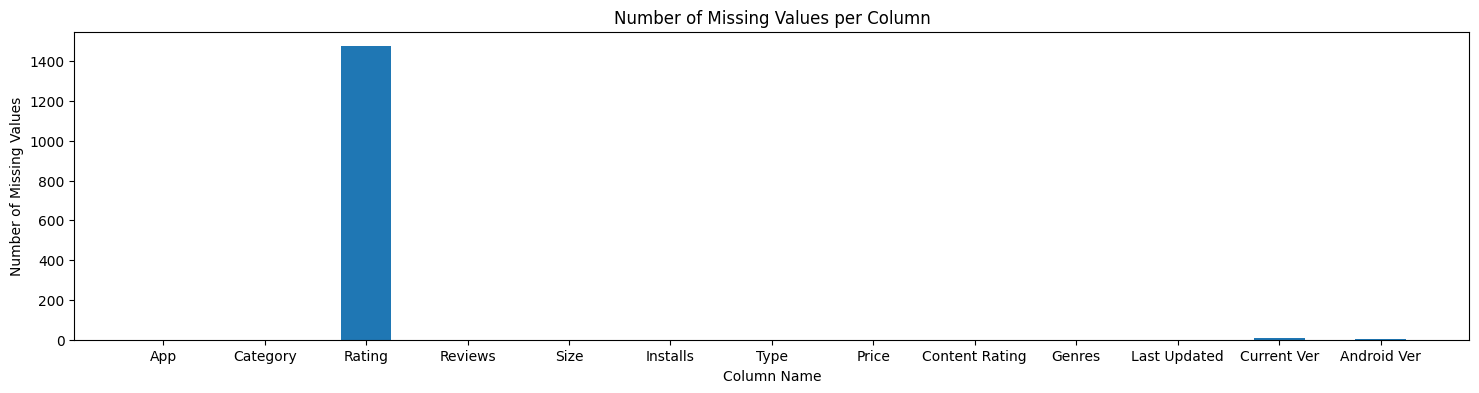

In [74]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (18, 4)
bar_width = 0.50
plt.bar(column_name_list_1, null_value_list_1, width = bar_width)

plt.title('Number of Missing Values per Column')
plt.xlabel('Column Name')
plt.ylabel('Number of Missing Values')

plt.show()

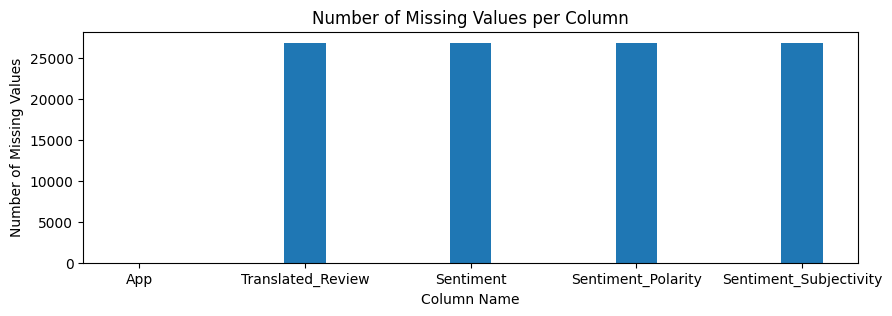

In [75]:
plt.rcParams['figure.figsize'] = (10, 3)
bar_width = 0.25
plt.bar(column_name_list_2, null_value_list_2, width = bar_width)

plt.title('Number of Missing Values per Column')
plt.xlabel('Column Name')
plt.ylabel('Number of Missing Values')

plt.show()

### What did you know about your dataset?

About the Play store dataframe I got to know the following things-
1) 

## ***2. Understanding Your Variables***

In [76]:
# Dataset Columns
pd.DataFrame(play_store_df.columns,columns = ['Variables of Playstore DataFrame'])

,Variables of Playstore DataFrame
0,App
1,Category
2,Rating
3,Reviews
4,Size
5,Installs
6,Type
7,Price
8,Content Rating
9,Genres


In [77]:
pd.DataFrame(user_review_df.columns,columns = ['Variables of User Review DataFrame'])

,Variables of User Review DataFrame
0,App
1,Translated_Review
2,Sentiment
3,Sentiment_Polarity
4,Sentiment_Subjectivity


In [78]:
# Dataset Describe
play_store_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [79]:
user_review_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### Variables Description 

**Description of the variables of play store dataset.**
1.   App:- The name of the mobile application that the variables describe.
2.   Category:- The category to which the app belongs, such as Games, Social, Productivity, etc.
3.   Rating:- The average user rating for the app, usually on a scale of 1 to 5 stars.
4.   Reviews:- The number of user reviews/ratings the app has received.
5.   Size:- The size of the app in MB.
6.   Installs:- Number of installation on Android devices.
7.   Type:- Whether the app is free or paid.
8.   Price:- The cost of the app if it is not free.
9.   Content Rating:- The age group for which the app is suitable, such as Everyone, Teen, Mature, etc.
10.   Genres:- The primary genre or category to which the app belongs, such as Action, Puzzle, Communication, etc.
11.  Last Updated:- The date when the app was last updated.
12.  Current Ver:- The current version of the app.
13.  Android Ver:- The minimum version of the Android required to run the app.

**Description of the variables of user review dataset.**
1.   App:- The name of the mobile application that the variables describe.
2.   Translated_Review:- The text review of the mobile application in translated language.
3.   Sentiment:- The sentiment of the translated review, which can be Positive, Negative or Neutral.
4.   Sentiment_Polarity:- The polarity of the sentiment expressed in the translated review. It can be a value between -1 (negative sentiment) to 1 (positive sentiment), with 0 being neutral.
5.   Sentiment_Subjectivity:- The degree of subjectivity in the translated review sentiment, which can range from 0 (objective) to 1 (subjective).

### Check Unique Values for each variable of play store dataset.

In [80]:
# Check Unique Values for each variable.
variable_list = list(play_store_df.columns)

def check_unique_values(variable):
  unique_values = play_store_df[variable].unique()
  return unique_values

In [ ]:
pd.DataFrame(check_unique_values(variable_list[0]),columns = ['Unique Apps'])

In [ ]:
pd.DataFrame(check_unique_values(variable_list[1]),columns = ['Unique Category'])

In [83]:
pd.DataFrame(check_unique_values(variable_list[2]),columns = ['Unique Rating'])

,Unique Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3
5,4.4
6,3.8
7,4.2
8,4.6
9,3.2


In [ ]:
pd.DataFrame(check_unique_values(variable_list[3]),columns = ['Unique Reviews'])

In [ ]:
pd.DataFrame(check_unique_values(variable_list[4]),columns = ['Unique Size'])

In [ ]:
pd.DataFrame(check_unique_values(variable_list[5]),columns = ['Unique Installs'])

In [ ]:
pd.DataFrame(check_unique_values(variable_list[6]),columns = ['Unique Type'])

In [ ]:
pd.DataFrame(check_unique_values(variable_list[7]),columns = ['Unique Price'])

In [ ]:
pd.DataFrame(check_unique_values(variable_list[8]),columns = ['Unique Content Rating'])

In [ ]:
pd.DataFrame(check_unique_values(variable_list[9]),columns = ['Unique Genres'])

In [ ]:
pd.DataFrame(check_unique_values(variable_list[10]),columns = ['Unique Last Updated'])

In [ ]:
pd.DataFrame(check_unique_values(variable_list[11]),columns = ['Unique Current Ver'])

In [ ]:
pd.DataFrame(check_unique_values(variable_list[12]),columns = ['Unique Android Ver'])

### Check Unique Values for each variable of user review dataset.

In [94]:
variable_list = list(user_review_df.columns)

def check_unique_values(variable):
  unique_values = user_review_df[variable].unique()
  return unique_values

In [ ]:
pd.DataFrame(check_unique_values(variable_list[0]),columns = ['Unique Apps'])

In [ ]:
pd.DataFrame(check_unique_values(variable_list[1]),columns = ['Unique Translated Review'])

In [ ]:
pd.DataFrame(check_unique_values(variable_list[2]),columns = ['Unique Sentiment'])

In [ ]:
pd.DataFrame(check_unique_values(variable_list[3]),columns = ['Unique Sentiment_Polarity'])

In [ ]:
pd.DataFrame(check_unique_values(variable_list[4]),columns = ['Unique Sentiment_Subjectivity'])

## 3. ***Data Wrangling***

### Data Wrangling Code

**Merge the two datasets on the common column 'App.**

In [100]:
user_review_df = user_review_df.rename(columns={'App': 'App_Name'})
play_store_df = play_store_df.rename(columns={'App': 'App_Name'})

In [126]:
merged_df = pd.merge(play_store_df, user_review_df, on='App_Name', how='inner')

**The average Sentiment_Polarity and Sentiment_Subjectivity for each App.**


In [ ]:
app_sentiment = merged_df.groupby('App_Name')['Sentiment_Polarity', 'Sentiment_Subjectivity'].agg(['mean'])

merged_df = pd.merge(merged_df, app_sentiment, on='App_Name', how='left')

**Changing some column values to numrical.**

In [103]:
content_rating_map = {'Everyone': 0, 'Everyone 10+': 1, 'Teen': 2, 'Mature 17+': 3, 'Adults only 18+': 4, 'Unrated': 5}
merged_df['Content Rating'] = merged_df['Content Rating'].map(content_rating_map)

In [138]:
merged_df['Size'] = pd.to_numeric(merged_df['Size'], errors='coerce')

In [105]:
merged_df['Price'] = merged_df['Price'].replace('$', '')
merged_df['Price'] = pd.to_numeric(merged_df['Price'], errors='coerce')

In [ ]:
merged_df['Installs'] = merged_df['Installs'].replace(',', '').replace('+', '').astype(int)

**Convert 'Last Updated' column to datetime**

In [107]:
merged_df['Last Updated'] = pd.to_datetime(merged_df['Last Updated'])

merged_df['Year'] = merged_df['Last Updated'].dt.year
merged_df['Month'] = merged_df['Last Updated'].dt.month
merged_df['Day'] = merged_df['Last Updated'].dt.day

**Top rated apps**

In [160]:
top_rated_apps = merged_df.groupby('App_Name')['Rating'].mean().sort_values(ascending=True)
top_apps = top_rated_apps.tail(25) 

top_apps_categories = []
top_apps_ratings = []
for app in top_apps.index:
    category = merged_df.loc[merged_df['App_Name'] == app, 'Category'].iloc[0]
    rating = merged_df.loc[merged_df['App_Name'] == app, 'Rating'].iloc[0]
    top_apps_categories.append(category)
    top_apps_ratings.append(rating)

top_apps_df = pd.DataFrame({'App_Name': top_apps.index, 'Category': top_apps_categories, 'Rating': top_apps_ratings})


**Correlation between app size and rating**

In [137]:
correlation = merged_df['Size'].corr(merged_df['Rating'])

print("Correlation coefficient between Size and Rating:", correlation)

Correlation coefficient between Size and Rating: 0.11260372618765212


**Distribution of ratings by content rating**

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

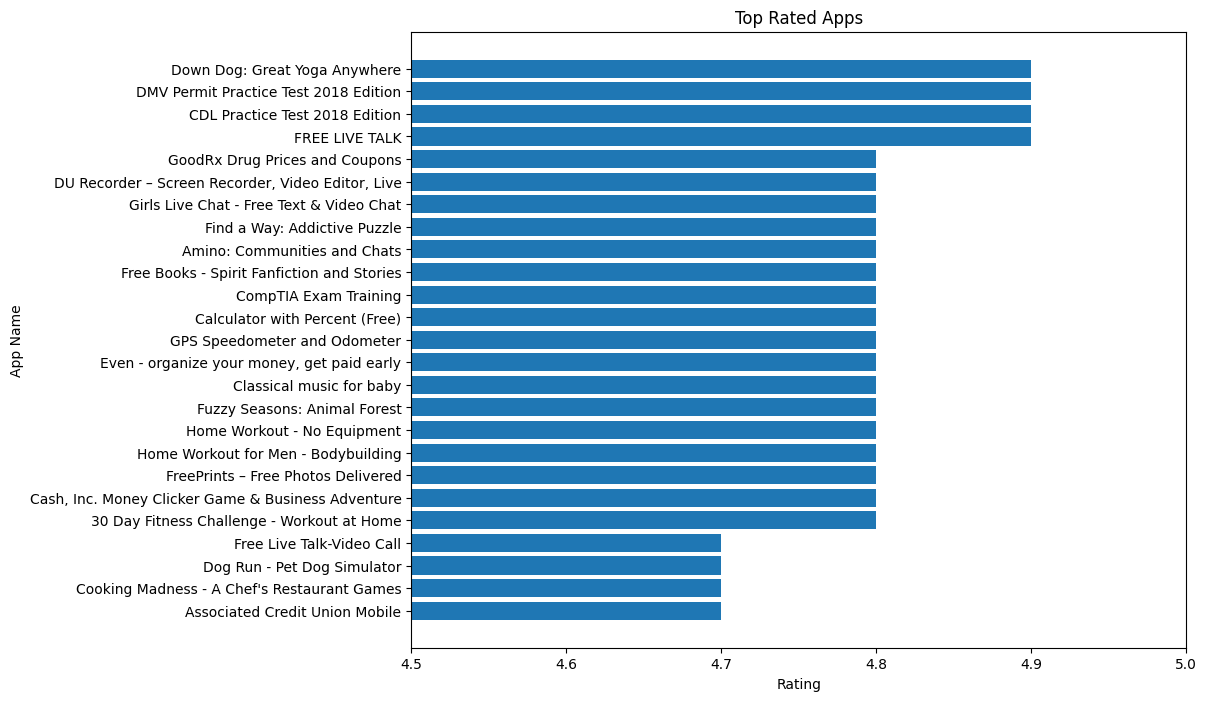

In [161]:
plt.figure(figsize=(10, 8))
plt.barh(top_apps_df['App_Name'], top_apps_df['Rating'])

plt.xlabel('Rating')
plt.ylabel('App Name')
plt.title('Top Rated Apps')
plt.xticks([4.5, 4.6, 4.7, 4.8, 4.9, 5.0])
plt.xlim(4.5, 5.0)

plt.show()

##### 1. Why did you pick the specific chart?


I picked this bar chart, which has horizontal bars because of the following reasons:-

1.  A horizontal bar chart allows for easy visual comparison of the ratings among different apps. The lengths of the bars represent the ratings, and it's easy to compare the lengths to identify the highest-rated apps.

2.  The horizontal orientation of the bars allows for a clear ranking of the apps based on their ratings. The apps with higher ratings will have longer bars, indicating their higher position in the ranking.

3.  The horizontal orientation of the bars makes it easier to read the app names on the y-axis, especially when the app names are long. This ensures that the chart is more readable and informative.

Overall, the horizontal bar chart is a suitable choice for showcasing the top-rated apps and their corresponding ratings, providing a clear and visually appealing representation of the data.

##### 2. What is/are the insight(s) found from the chart?

From the horizontal bar chart representing the top-rated apps overall, we can derive the following insights:
1.   The chart clearly shows the top-rated apps based on their ratings. The apps listed at the top of the chart have the highest ratings, indicating that they are highly regarded by users.
2.   The chart can help identify the apps that have consistently high ratings, indicating their strong performance and user satisfaction. These apps may have certain features or qualities that resonate well with users.
3.   By examining the chart, we may identify patterns or trends related to the app categories or genres. For example, if certain categories consistently appear among the top-rated apps, it suggests that users highly value apps in those categories.

Overall, the chart provides insights into the highest-rated apps, their ratings, and potential patterns or trends in app ratings, allowing for a better understanding of user preferences and app performance.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

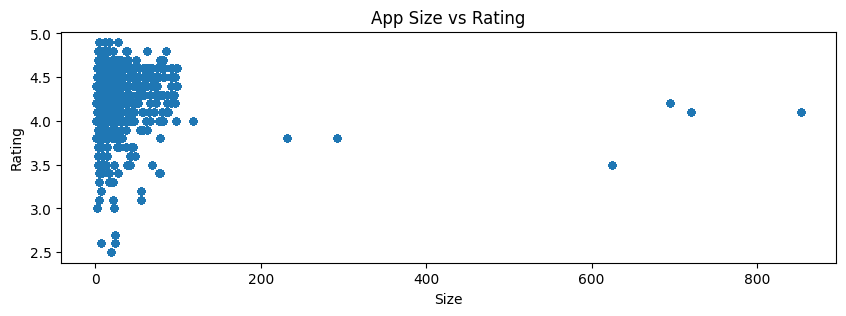

In [145]:
plt.scatter(merged_df['Size'], merged_df['Rating'],s=20)

plt.xlabel('Size')
plt.ylabel('Rating')
plt.title('App Size vs Rating')
plt.show()

##### 1. Why did you pick the specific chart?

 I picked the scatter plot as it is an effective visualization tool to visualize the relationship between the app size and its rating. A scatter plot is commonly used to display the correlation or pattern between two continuous variables. In this scenario, the app size (continuous variable) is plotted on the x-axis, the rating (continuous variable) is plotted on the y-axis, and each dot represents an app.

##### 2. What is/are the insight(s) found from the chart?

From the scatter plot, the following insights can be derived:

1)  The majority of apps in the dataset have sizes less than 100MB. This indicates that app developers often prioritize keeping their apps relatively small in terms of storage space requirements.

2)  The ratings of the apps in the dataset mostly falls between 4 and 4.8. This suggests that users tend to rate apps positively, with a significant number of apps receiving high ratings.

3)  The scatter plot shows a higher concentration of apps with smaller sizes (less than 100MB) and ratings between 4 and 4.8. This concentration suggests that many popular apps are relatively compact in size and receive positive ratings from users.

These insights provide a better understanding of the relationship between app size and rating within the dataset, indicating that other factors beyond app size likely influence user ratings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***